# Explore here

In [119]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**APPROACH: Series de Tiempo Multivariadas**

- Comprobar causalidad entre variables
- Variables sin relacion se modelan aparte
- Poner atencion a estacionalidad y como se incorpora en la prediccion

**1) Acuiferos**

In [120]:
#cargar datasets de acuiferos
df_auser = pd.read_csv('../data/raw/Aquifer_Auser.csv')
df_doganella = pd.read_csv('../data/raw/Aquifer_Doganella.csv')
df_luco = pd.read_csv('../data/raw/Aquifer_Luco.csv')
df_petrignano = pd.read_csv('../data/raw/Aquifer_Petrignano.csv')

#mostrar df de auser
df_auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [121]:
#explorar dataset de auser
df_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [122]:
#convertir la columna de fecha a datetime
df_auser['Date'] = pd.to_datetime(df_auser['Date'], format='%d/%m/%Y')
df_auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [134]:
df_auser.columns

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

<Axes: >

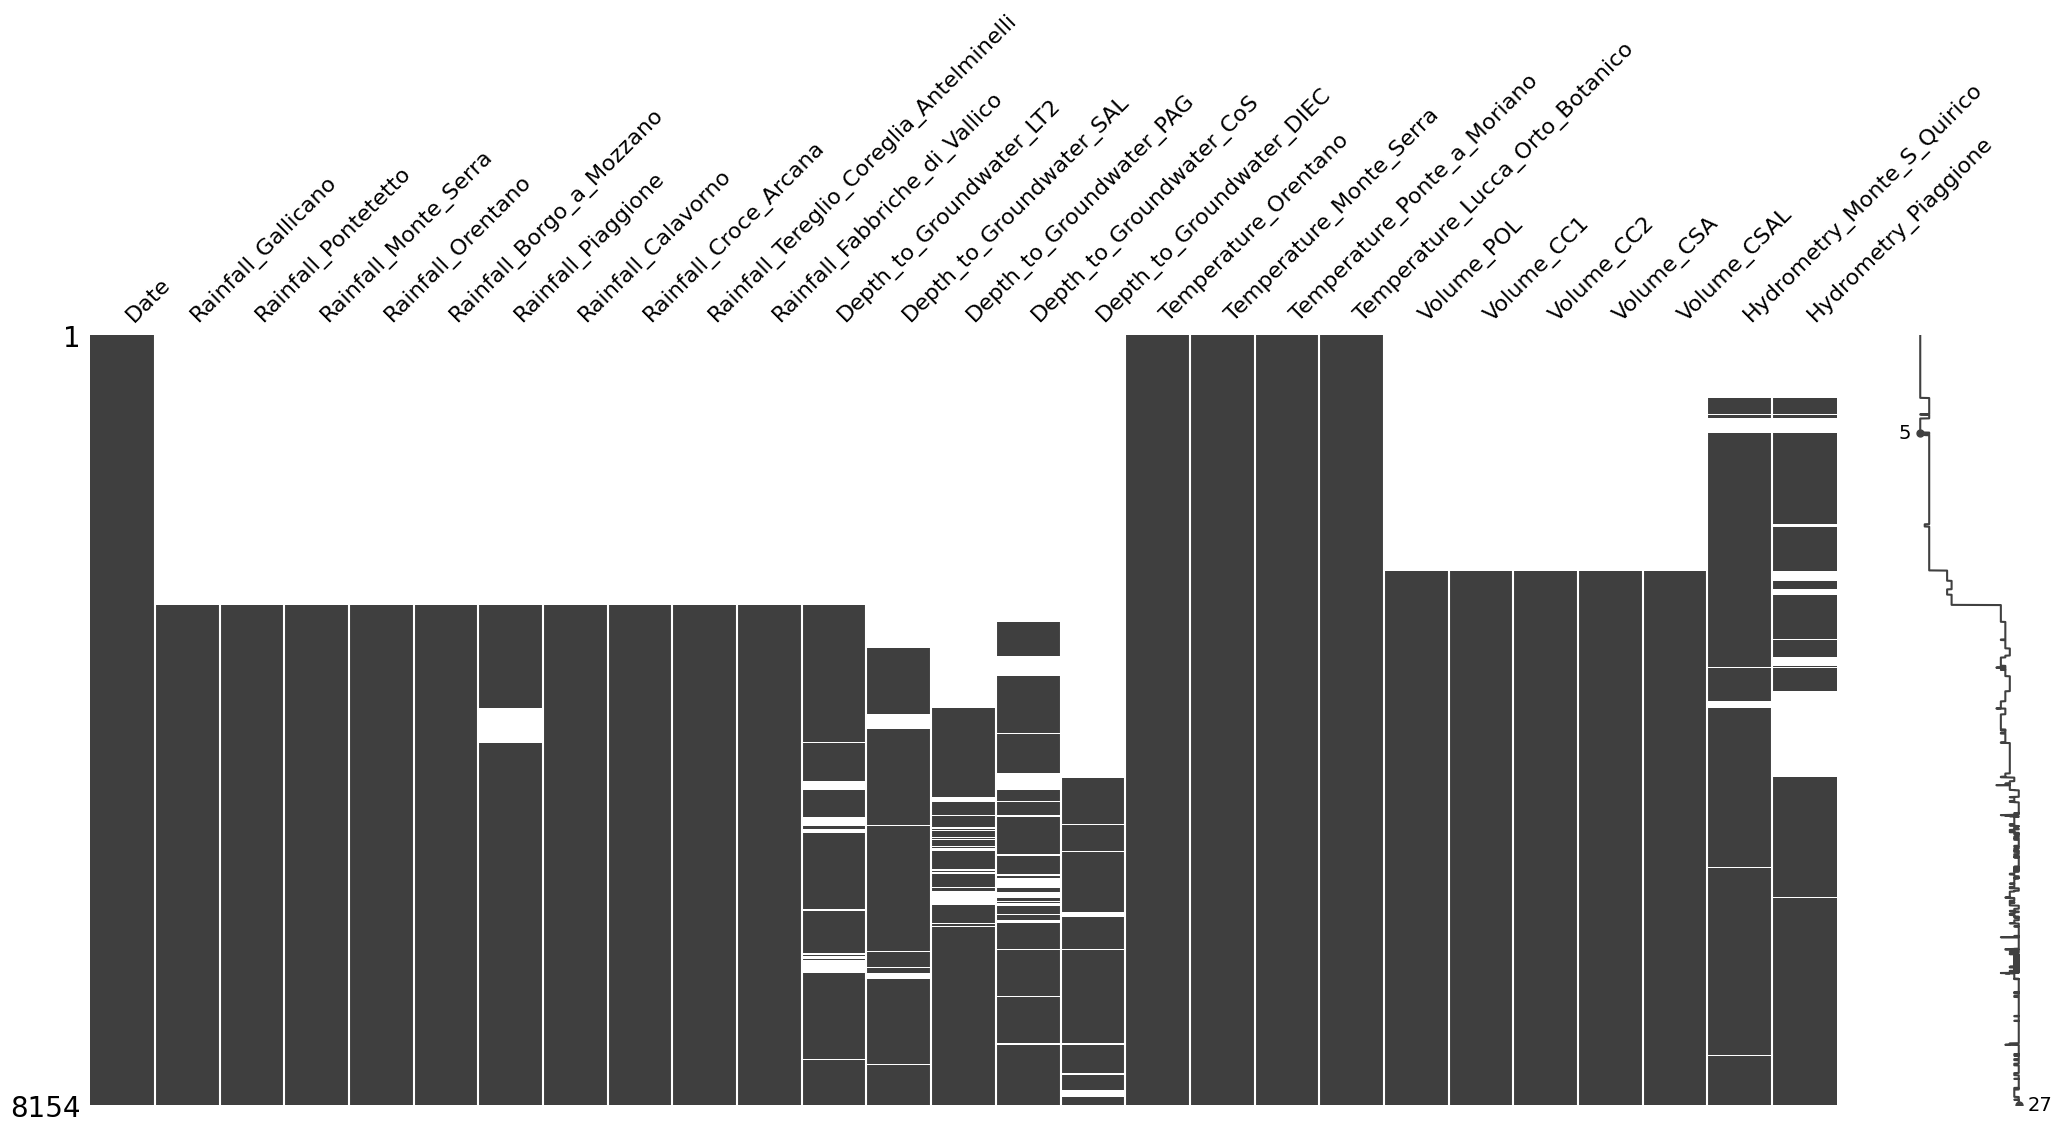

In [123]:
#visualizar nans
msno.matrix(df_auser)

In [125]:
#borrar filas antiguas
df_auser = df_auser[df_auser['Rainfall_Pontetetto'].notna()].reset_index(drop=True)

#ver registros con lluvia piaggione de valores nulos
df_auser[df_auser['Rainfall_Piaggione'].isna()]

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
1096,2009-01-01,42.4,19.6,11.6,5.2,54.0,NaN,52.4,3.2,19.2,...,3.90,5.25,2.70,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.48,NaN
1097,2009-01-02,2.2,0.6,0.0,0.2,0.2,NaN,2.8,1.6,0.0,...,3.75,5.55,4.45,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.48,NaN
1098,2009-01-03,0.2,0.2,0.0,0.0,0.0,NaN,0.0,0.6,0.0,...,-1.45,3.20,4.40,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.44,NaN
1099,2009-01-04,0.0,0.0,0.0,0.2,0.0,NaN,0.2,0.0,0.0,...,0.55,1.45,1.30,-9671.612903,-15648.59613,-12005.0208,0.0,0.0,0.39,NaN
1100,2009-01-05,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,3.10,2.20,0.60,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2009-12-27,0.2,0.0,0.0,0.0,0.0,NaN,0.0,2.4,0.0,...,4.40,7.35,6.00,-10955.645160,-15841.44000,-12087.1008,0.0,0.0,0.92,NaN
1457,2009-12-28,0.0,0.0,21.8,18.2,0.0,NaN,0.2,0.0,9.6,...,4.70,5.35,6.15,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.77,NaN
1458,2009-12-29,17.4,20.0,6.4,3.8,18.0,NaN,14.2,0.0,4.0,...,7.15,8.25,5.50,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.73,NaN
1459,2009-12-30,16.4,15.4,9.6,6.8,22.6,NaN,16.6,2.0,18.6,...,9.50,11.70,8.75,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.75,NaN


In [126]:
#check for missing values
target_variables = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']

df_auser[target_variables].describe()

,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS
count,4802.000000,4545.000000,4315.000000
mean,-13.372041,-5.651274,-6.316783
std,1.037100,0.642939,1.379046
min,-15.310000,-7.000000,-9.570000
25%,-14.380000,-6.040000,-7.470000
50%,-13.040000,-5.680000,-6.250000
75%,-12.530000,-5.300000,-5.090000
max,0.000000,0.000000,0.000000


In [127]:
#reemplazar valores 0 por nulos
df_auser_copy = df_auser[target_variables].replace(np.nan, 0)

#reemplazar valores 0 por nulos en df original
df_auser[target_variables] = df_auser[target_variables].replace(0, np.nan)

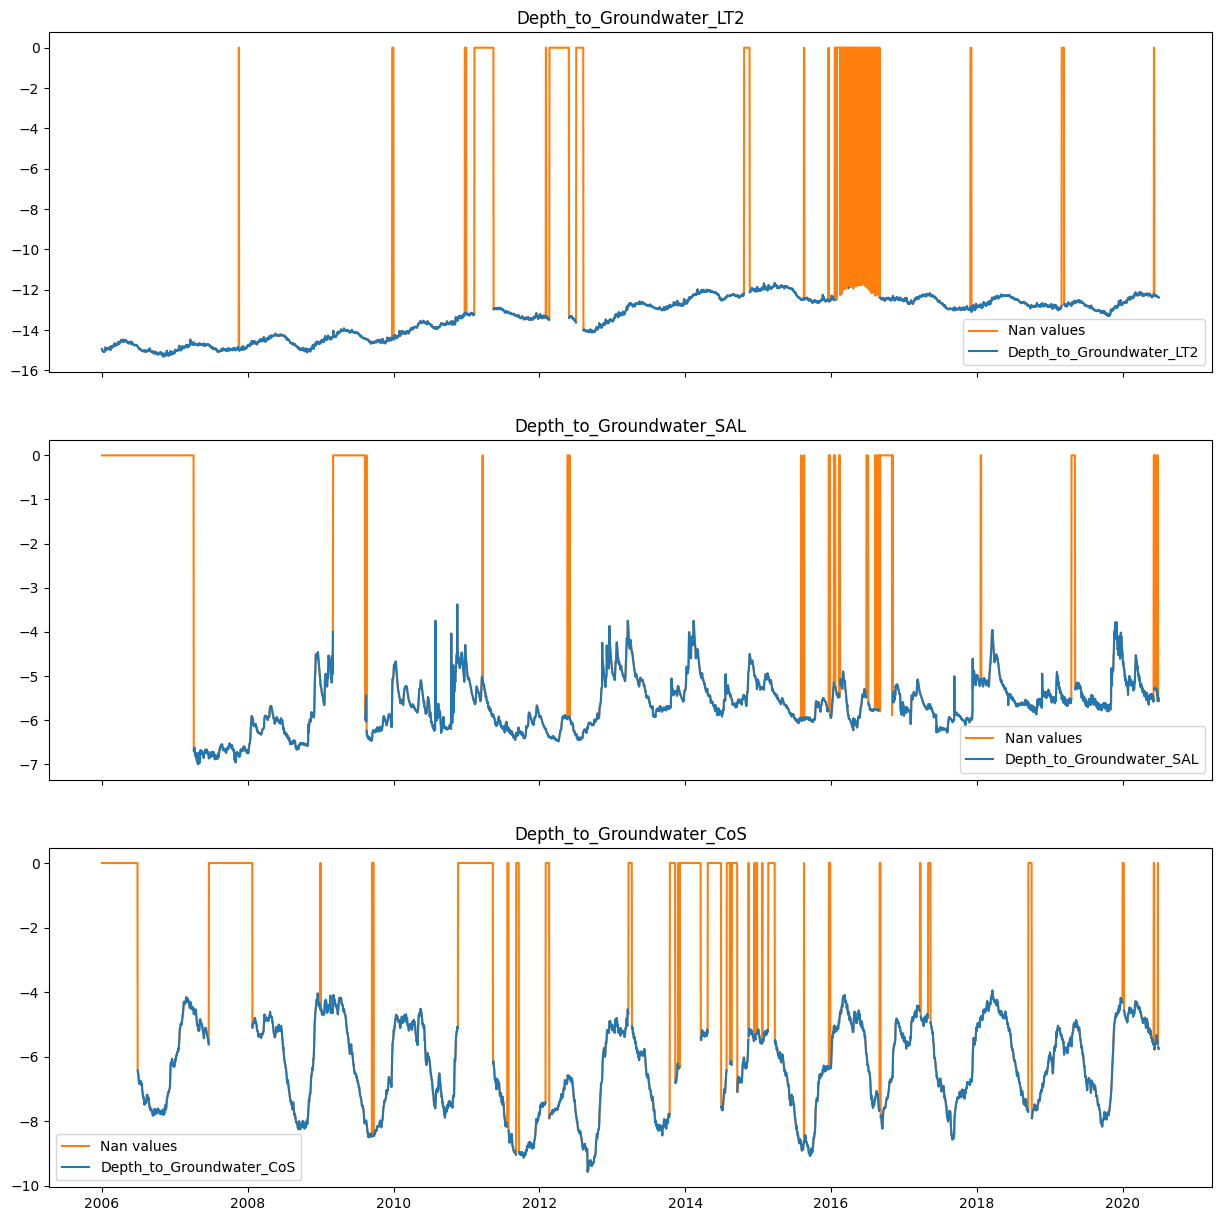

In [128]:
#crear grilla para graficos
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

#crear bucle para graficar cada variable con sus valores nulos evidenciados en df copia
for i, var in enumerate(target_variables):
    #graficar df con valores nulos y evidenciarlos con valores 0 en df copia
    axes[i].plot(df_auser['Date'], df_auser_copy[var], label= 'Nan values', color='C1')
    axes[i].plot(df_auser['Date'], df_auser[var], label=var, color='C0')
    axes[i].set_title(var)
    axes[i].legend()

- Las variables objetivo carecen de datos continuos. A pesar de no ser ideal y de poder introducir sesgos, dada la estacionalidad esperada en la fluctacion de los niveles de agua, procederemos a imputar los datos faltantes mediante interpolacion.

In [ ]:
# convertir date a datetime y usarlo como índice
df_auser['Date'] = pd.to_datetime(df_auser['Date'])
df_auser.set_index('Date', inplace=True)

# Resetear copia del dataframe original
df_auser_copy = df_auser.copy()

#definir funcion para obtener nans internos
def get_internal_nan_indices(series):
    full_index = series.index
    first_valid = series.first_valid_index()
    last_valid = series.last_valid_index()

    # Crear máscara booleana del mismo largo que la serie original
    internal_nan_mask = pd.Series(False, index=full_index)

    # Limitar solo entre primer y último valor no nulo
    internal_range = series.loc[first_valid:last_valid]
    internal_nan_mask.loc[first_valid:last_valid] = internal_range.isnull()

    return internal_nan_mask

# interpolación solo para fines de STL (rellenar extremos)
def prepare_for_stl(series):
    return series.interpolate(method='linear').ffill().bfill()

# STL y desestacionalización
def stl_impute(series, mask_internal_nans, period=365):
    series_prep = prepare_for_stl(series)
    stl = STL(series_prep, period=period, seasonal=13)
    res = stl.fit()

    deseasonal = series_prep - res.seasonal
    deseasonal_imputed = deseasonal.interpolate(method='linear')
    final_series = deseasonal_imputed + res.seasonal

    # Alinear final_series con el índice original por si acaso
    final_series = final_series.reindex(series.index)

    # Reemplazar solo valores imputables
    result = series.copy()
    result[mask_internal_nans] = final_series[mask_internal_nans]
    return result

In [130]:
#obtener nans de cada columna objetivo
imputed_indices_LT2 = get_internal_nan_indices(df_auser['Depth_to_Groundwater_LT2'])
imputed_indices_SAL = get_internal_nan_indices(df_auser['Depth_to_Groundwater_SAL'])
imputed_indices_CoS = get_internal_nan_indices(df_auser['Depth_to_Groundwater_CoS'])

# Aplicar a cada columna objetivo
df_auser_copy['Depth_to_Groundwater_LT2'] = stl_impute(df_auser['Depth_to_Groundwater_LT2'], imputed_indices_LT2)
df_auser_copy['Depth_to_Groundwater_SAL'] = stl_impute(df_auser['Depth_to_Groundwater_SAL'], imputed_indices_SAL)
df_auser_copy['Depth_to_Groundwater_CoS'] = stl_impute(df_auser['Depth_to_Groundwater_CoS'], imputed_indices_CoS)

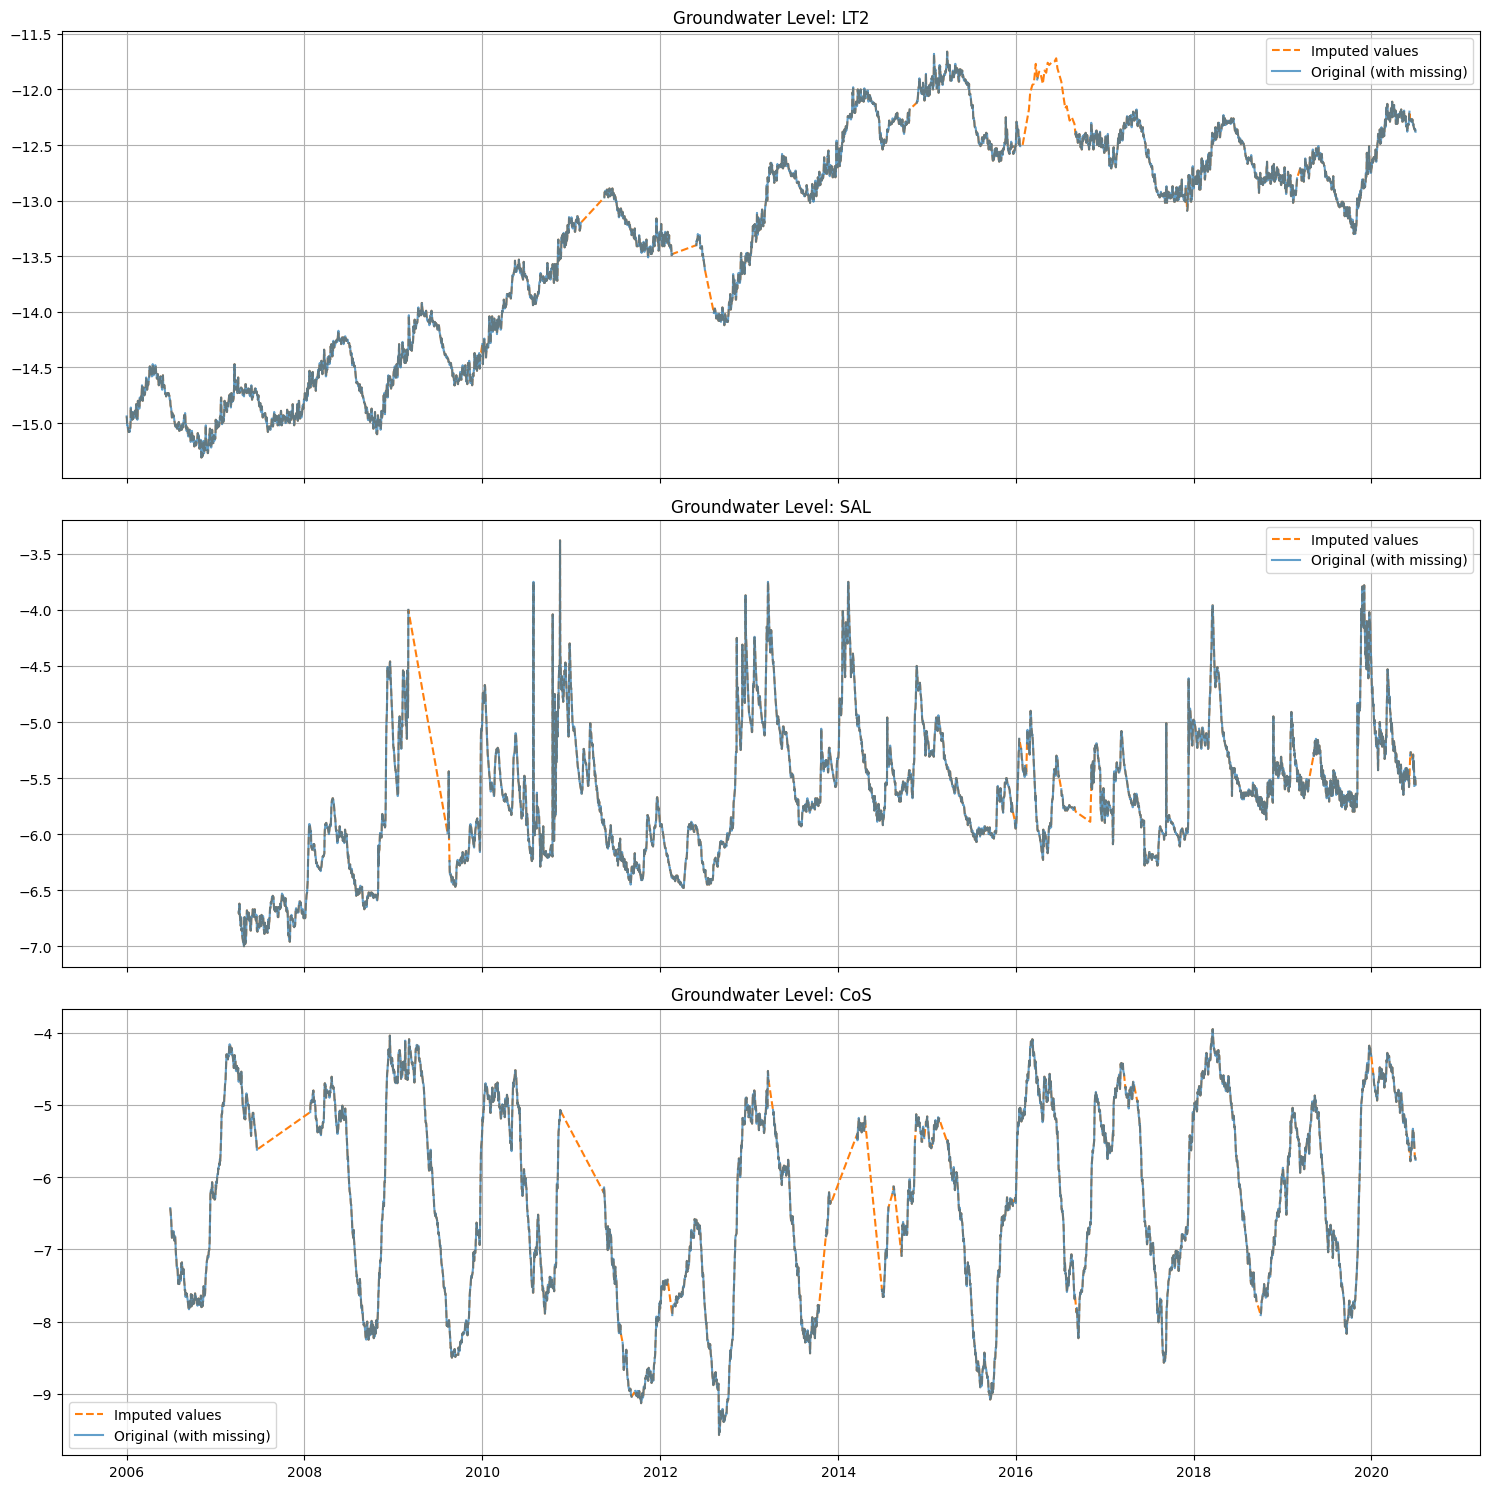

In [131]:
# Crear figura con 3 subgráficos
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Graficar cada variable
for i, var in enumerate(target_variables):    
    # Serie imputada
    axes[i].plot(df_auser_copy.index, df_auser_copy[var], 
                 label='Imputed values', 
                 color='C1', 
                 linestyle='--')
    
    # Serie original (con huecos)
    axes[i].plot(df_auser.index, df_auser[var], 
                 label='Original (with missing)', 
                 color='C0', 
                 alpha=0.7)
        
    axes[i].set_title(f'Groundwater Level: {var.split("_")[-1]}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#realizamos el mismo proceso de imputacion para las variables predictoras
##obtener nans de cada columna predictora
imputed_indices_rf_piaggione = get_internal_nan_indices(df_auser['Rainfall_Piaggione'])
imputed_indices_hd_monte_s_quirico = get_internal_nan_indices(df_auser['Hydrometry_Monte_S_Quirico'])
imputed_indices__hd_piaggione = get_internal_nan_indices(df_auser['Hydrometry_Piaggione'])
imputed_indices_diec = get_internal_nan_indices(df_auser['Depth_to_Groundwater_DIEC'])
imputed_indices_pag = get_internal_nan_indices(df_auser['Depth_to_Groundwater_PAG'])


# Aplicar a cada columna predictora
df_auser_copy['Rainfall_Piaggione'] = stl_impute(df_auser['Rainfall_Piaggione'], imputed_indices_rf_piaggione)
df_auser_copy['Hydrometry_Monte_S_Quirico'] = stl_impute(df_auser['Hydrometry_Monte_S_Quirico'], imputed_indices_hd_monte_s_quirico)
df_auser_copy['Hydrometry_Piaggione'] = stl_impute(df_auser['Hydrometry_Piaggione'], imputed_indices__hd_piaggione)
df_auser_copy['Depth_to_Groundwater_DIEC'] = stl_impute(df_auser['Depth_to_Groundwater_DIEC'], imputed_indices_diec)
df_auser_copy['Depth_to_Groundwater_PAG'] = stl_impute(df_auser['Depth_to_Groundwater_PAG'], imputed_indices_pag)

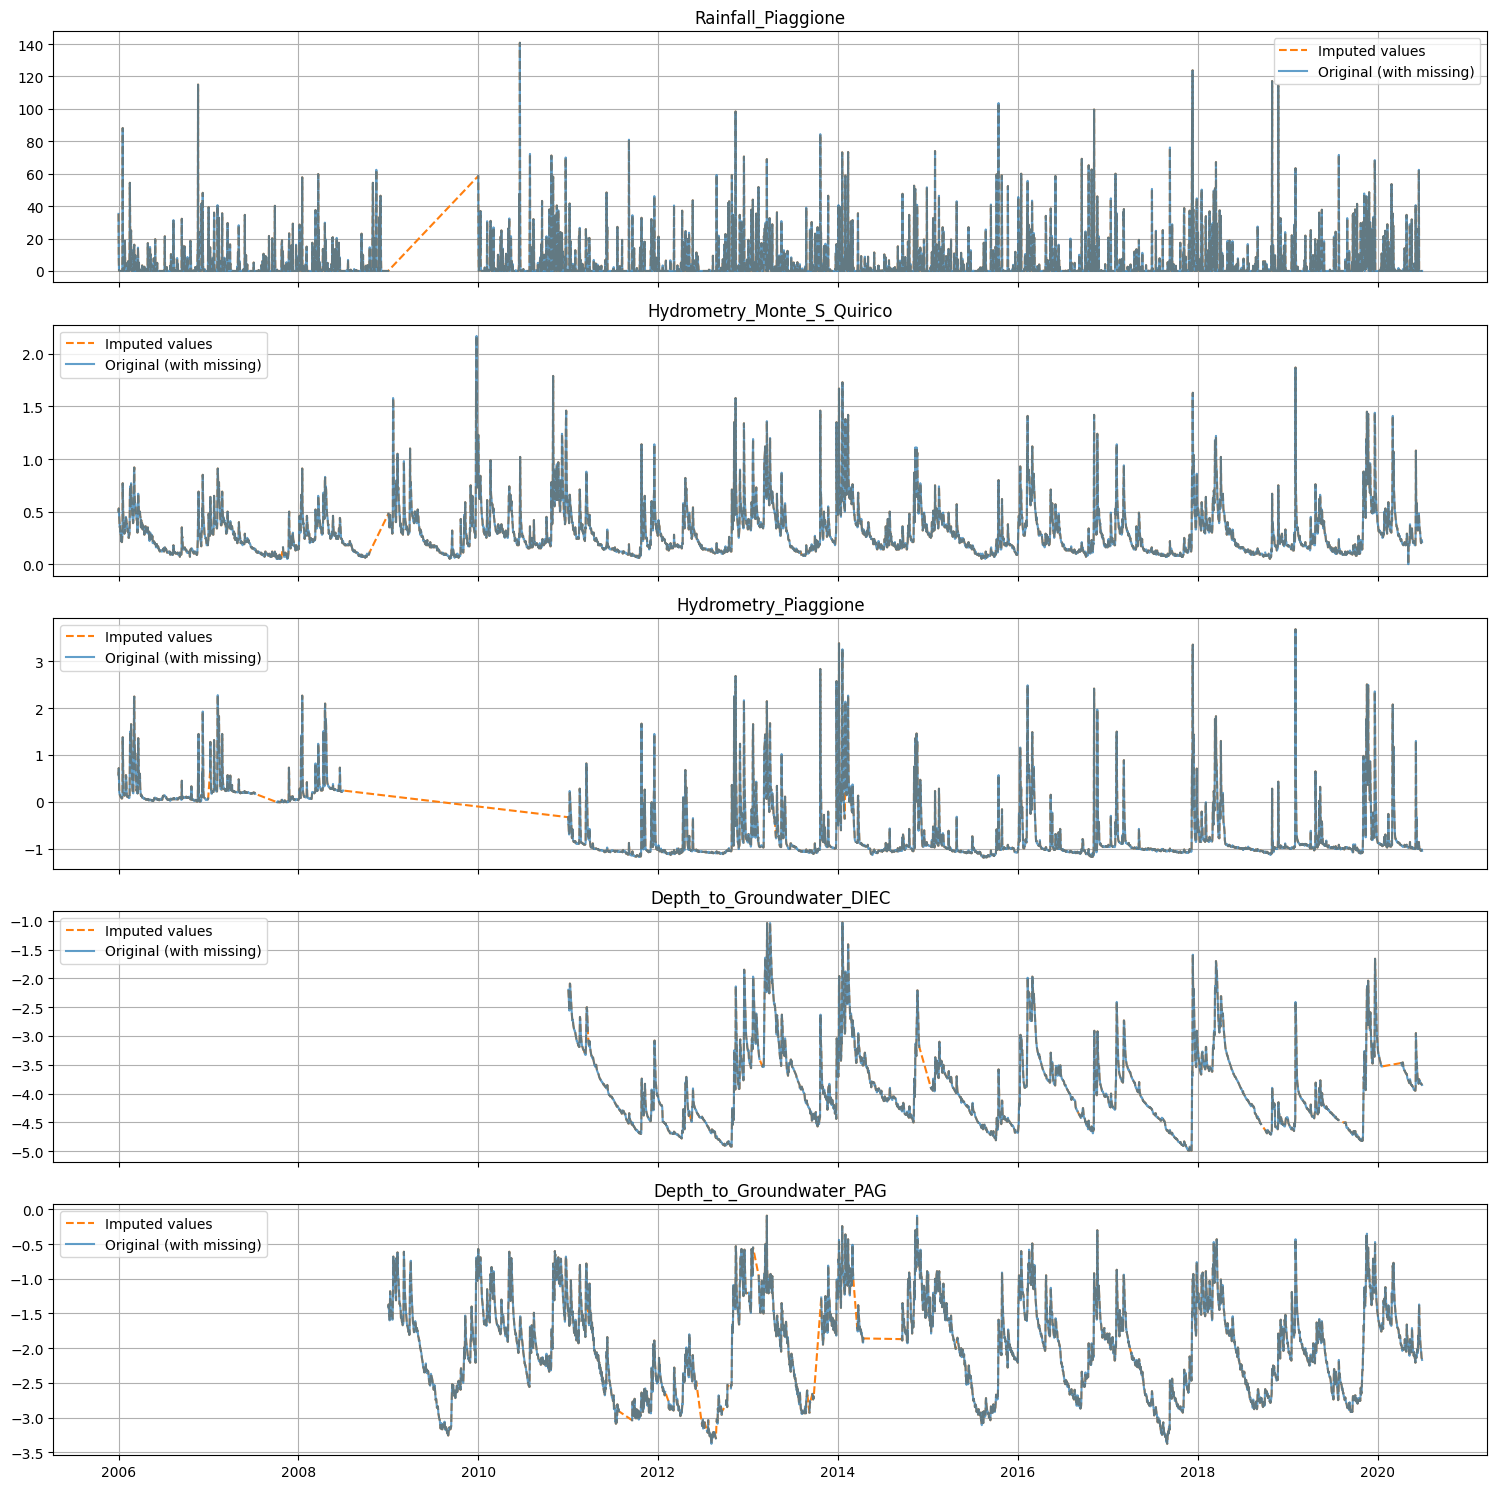

In [140]:
#graficar variables predictoras imputadas
fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

# Graficar cada variable
for i, var in enumerate(['Rainfall_Piaggione', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione', 'Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG']):    
    # Serie imputada
    axes[i].plot(df_auser_copy.index, df_auser_copy[var], 
                 label='Imputed values', 
                 color='C1', 
                 linestyle='--')
    
    # Serie original (con huecos)
    axes[i].plot(df_auser.index, df_auser[var], 
                 label='Original (with missing)', 
                 color='C0', 
                 alpha=0.7)
        
    axes[i].set_title(f'{var}')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()